# Imports

In [1]:
import os

from SignLanguageTranslator.utils import visualization as vis

from importlib import reload
# reload(vis)

import numpy as np
from IPython.display import clear_output, Image, Video
import PIL
import moviepy.editor as mpy


# Load landmarks

In [2]:
word='d-D' # double handed 'D'

In [10]:
# file reading
pose_multi_frame_landmarks = np.loadtxt(os.path.join('inputs', f'pose_{word}_person205_front.csv'), skiprows=1,delimiter=',')
hand_multi_frame_landmarks = np.loadtxt(os.path.join('inputs', f'hand_{word}_person205_front.csv'), skiprows=1,delimiter=',')

# reshaping
pose_multi_frame_landmarks = pose_multi_frame_landmarks.reshape((-1,33,4))[...,:3]
hand_multi_frame_landmarks = hand_multi_frame_landmarks.reshape((-1,42,3))

# fix error
pose_multi_frame_landmarks[...,1] *= -1
hand_multi_frame_landmarks[...,:2] *= -1

# stacking
all_multi_frame_landmarks = np.concatenate([pose_multi_frame_landmarks,
                                            hand_multi_frame_landmarks], axis=-2)

# Visualize

### `Single Frame`

In [11]:
frame_no = 25

pose_img = vis.landmarks_to_image(pose_multi_frame_landmarks[frame_no])
hand_img = vis.landmarks_to_image(hand_multi_frame_landmarks[frame_no])
all_img  = vis.landmarks_to_image( all_multi_frame_landmarks[frame_no])

stacked_img = np.concatenate([pose_img, hand_img, all_img], axis=1)
stacked_img = PIL.Image.fromarray(stacked_img)
stacked_img.save(os.path.join('outputs', 'd-D_single_frame_images.png'))

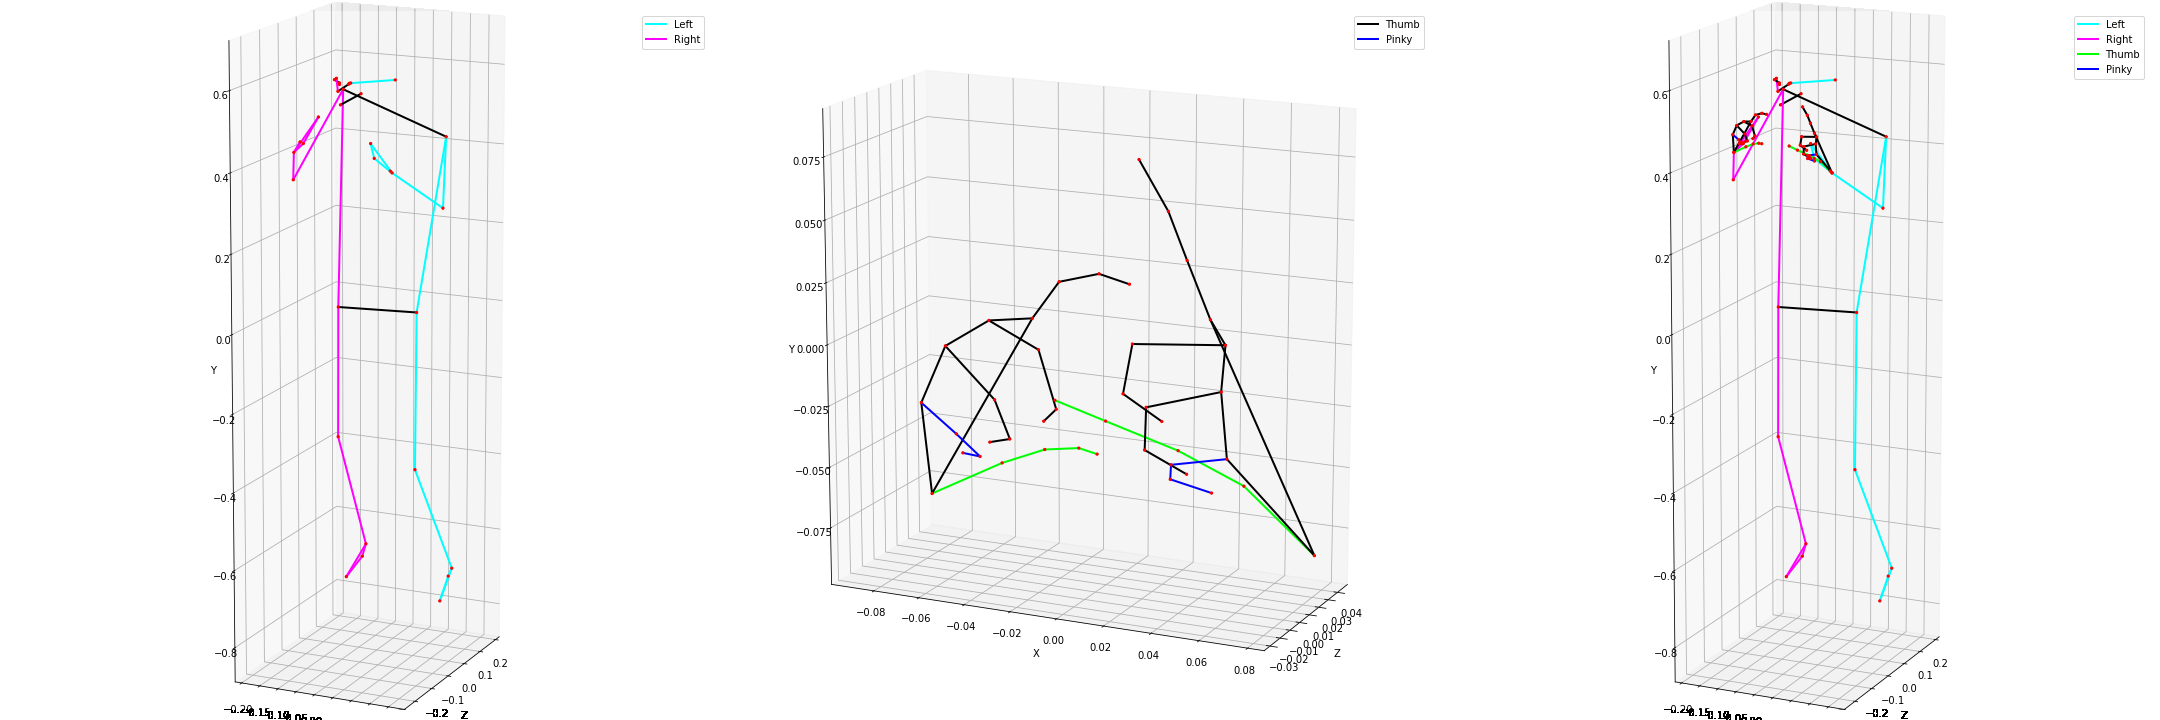

: 

In [12]:
Image(os.path.join('outputs', 'd-D_single_frame_images.png'))

### `Multiple Frames in Image`

In [ ]:
start =  0
step  = 15

pose_img = vis.multi_frame_landmarks_to_image(pose_multi_frame_landmarks[start::step])
hand_img = vis.multi_frame_landmarks_to_image(hand_multi_frame_landmarks[start::step*2])
all_img  = vis.multi_frame_landmarks_to_image( all_multi_frame_landmarks[start::step])

stacked_img = np.concatenate([pose_img, hand_img, all_img], axis=1)
stacked_img = PIL.Image.fromarray(stacked_img)
stacked_img.save(os.path.join('outputs', 'd-D_multi_frame_images.png'))

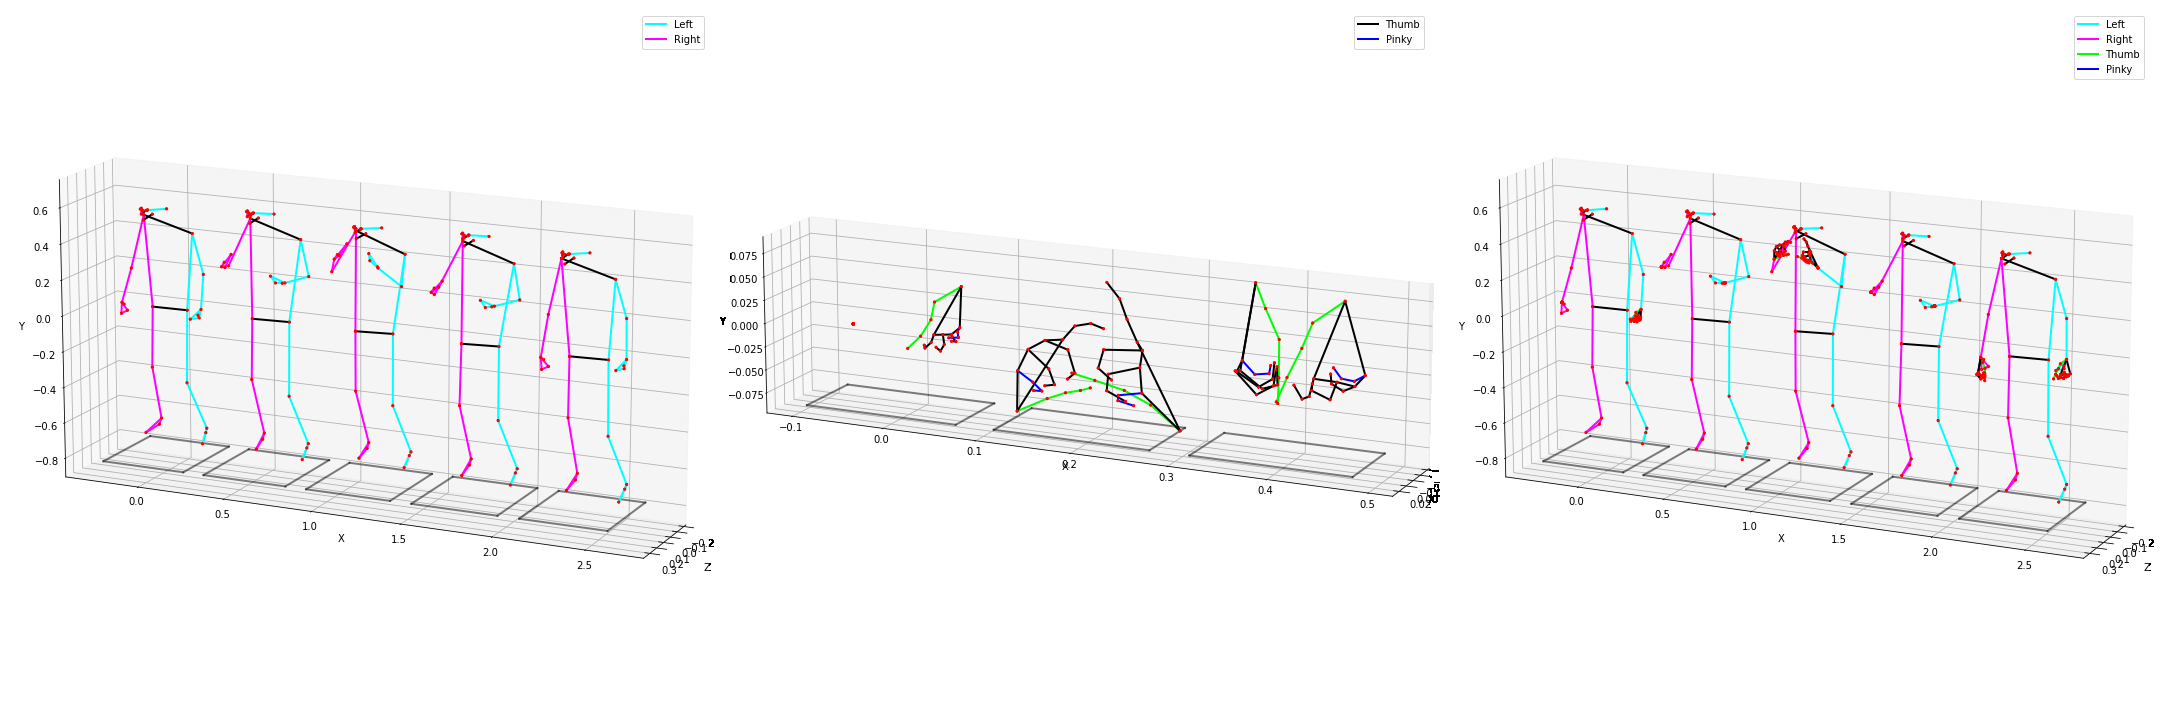

In [16]:
Image(os.path.join('outputs', 'd-D_multi_frame_images.png'))

In [ ]:
pose_clip = vis.multi_frame_landmarks_to_video(pose_multi_frame_landmarks)
hand_clip = vis.multi_frame_landmarks_to_video(hand_multi_frame_landmarks)
all_clip  = vis.multi_frame_landmarks_to_video( all_multi_frame_landmarks)

stacked_clip = mpy.clips_array([[pose_clip, hand_clip, all_clip]])
stacked_clip.write_videofile(os.path.join('outputs',"d-D_landmarks_video.mp4"), threads=8)
[clip.close() for clip in [pose_clip, hand_clip, all_clip, stacked_clip]]
clear_output()

In [17]:
# Video(os.path.join('outputs', "d-D_landmarks_video.mp4"), width=1300, html_attributes='loop autoplay')

### Available Options

In [ ]:
clip = vis.multi_frame_landmarks_to_video(
    all_multi_frame_landmarks,
    rotate=True, azim=60, elev=45,
    landmarks_color=(0,1,1), fps=30,
    move_hands=True, hands_location='wrists', hands_scale=2.0
)
clip.write_videofile(os.path.join('outputs',"visualize_options.mp4"), threads=8)
clip.close()
clear_output()

In [18]:
Video(os.path.join('outputs',"visualize_options.mp4"), html_attributes='loop autoplay')